In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Affiche la version pour confirmation
print(f"TensorFlow Version: {tf.__version__}")

# Chargement du jeu de données MNIST
# x_train/x_test = images, y_train/y_test = étiquettes (0-9)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"Forme des images d'entraînement originales: {x_train.shape}")

TensorFlow Version: 2.20.0
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 45s 4us/step
Forme des images d'entraînement originales: (60000, 28, 28)


In [2]:
# Normalisation : divise les pixels par 255.0 pour avoir des valeurs entre 0.0 et 1.0
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Aplatissement (Reshape) : convertit chaque image 28x28 en un vecteur 784 pour le réseau Dense
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

print(f"Forme des données d'entraînement après aplatissement: {x_train.shape}")

Forme des données d'entraînement après aplatissement: (60000, 784)


In [13]:
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    keras.layers.BatchNormalization(),  # NOUVELLE LIGNE
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 16ms/step - accuracy: 0.9324 - loss: 0.2226 - val_accuracy: 0.9660 - val_loss: 0.1079
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 14ms/step - accuracy: 0.9630 - loss: 0.1196 - val_accuracy: 0.9728 - val_loss: 0.0864
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9695 - loss: 0.0973 - val_accuracy: 0.9747 - val_loss: 0.0803
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9733 - loss: 0.0836 - val_accuracy: 0.9761 - val_loss: 0.0782
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9771 - loss: 0.0717 - val_accuracy: 0.9795 - val_loss: 0.0633
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9788 - loss: 0.0648 - val_accuracy: 0.9800 - val_loss: 0.0662
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9801 - loss: 0.0600 - val_accuracy: 0.9818 - val_loss: 0.0632
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9823 -

In [8]:
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"Training accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")



Training accuracy: 0.9730
Test accuracy: 0.9693


In [4]:
print("Démarrage de l'entraînement...")

# Lancement de l'apprentissage
history = model.fit(
    x_train,
    y_train,
    epochs=5,           # 5 itérations complètes sur toutes les données
    batch_size=128,     # Traite 128 images à la fois
    validation_split=0.1 # Met de côté 10% de x_train pour la validation
)

print("Entraînement terminé.")

Démarrage de l'entraînement...
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9131 - loss: 0.3009 - val_accuracy: 0.9652 - val_loss: 0.1267
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9620 - loss: 0.1308 - val_accuracy: 0.9752 - val_loss: 0.0892
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9740 - loss: 0.0886 - val_accuracy: 0.9777 - val_loss: 0.0795
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9799 - loss: 0.0665 - val_accuracy: 0.9782 - val_loss: 0.0716
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9841 - loss: 0.0538 - val_accuracy: 0.9812 - val_loss: 0.0669
Entraînement terminé.


In [5]:
# Évaluation du modèle sur les données de test non vues
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print("--- Résultat ---")
print(f"Précision sur les données de test: {test_acc:.4f}")

# Sauvegarde du modèle sous le nom demandé par le TP
model_filename = "mnist_model.h5"
model.save(model_filename)
print(f"Modèle sauvegardé sous {model_filename} dans le dossier du projet.")

--- Résultat ---
Précision sur les données de test: 0.9785
Modèle sauvegardé sous mnist_model.h5 dans le dossier du projet.


In [ ]:
1 import mlflow
 2 import mlflow.tensorflow
 3 ...
 4
 5 Variables pour les param tres
 6 EPOCHS = 5
 7 BATCH_SIZE = 128
 8 DROPOUT_RATE = 0.2
 9
 10 #Lancement de la session de suivi MLflow
 11 with mlflow.start_run():
 12 # Enregistrement des param tres
 13 mlflow.log_param("epochs", EPOCHS)
 14 mlflow.log_param("batch_size", BATCH_SIZE)
 15 mlflow.log_param("dropout_rate", DROPOUT_RATE)
 16
 17 # Construction et entra nement du mod le (utiliser les variablesd finies)
 18 # ...
  # Enregistrement des m triques
 21 mlflow.log_metric("test_accuracy", test_acc)
 22
 23 # Enregistrement du mod le complet
 24 mlflow.keras.log_model(model, "mnist-model")

In [2]:
from tensorflow import keras

# Charger le modèle déjà entraîné
model = keras.models.load_model("mnist_model.h5")

# Charger les données MNIST
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisation
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0


In [3]:
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"Training accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Courbes d\'apprentissage')
plt.xlabel('Épochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Training accuracy: 0.9904
Test accuracy: 0.9785


NameError: name 'history' is not defined

<Figure size 800x400 with 0 Axes>

In [1]:
import matplotlib.pyplot as plt

# Évaluer les performances sur train et test
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"Training accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

# Visualisation des courbes d'apprentissage
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Courbes d\'apprentissage')
plt.xlabel('Épochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


NameError: name 'model' is not defined

In [4]:
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"Training accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")


Training accuracy: 0.9904
Test accuracy: 0.9785


In [9]:
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras import models, layers, regularizers
import matplotlib.pyplot as plt

optimizers = {
    "SGD": SGD(learning_rate=0.01),
    "RMSprop": RMSprop(learning_rate=0.001),
    "Adam": Adam(learning_rate=0.001)
}

histories = {}

for name, opt in optimizers.items():
    print(f"\n🔹 Training with {name} optimizer...")
    
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(784,),
                     kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu',
                     kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    histories[name] = model.fit(
        x_train, y_train, epochs=10,
        validation_data=(x_test, y_test),
        verbose=0
    )



🔹 Training with SGD optimizer...

🔹 Training with RMSprop optimizer...

🔹 Training with Adam optimizer...


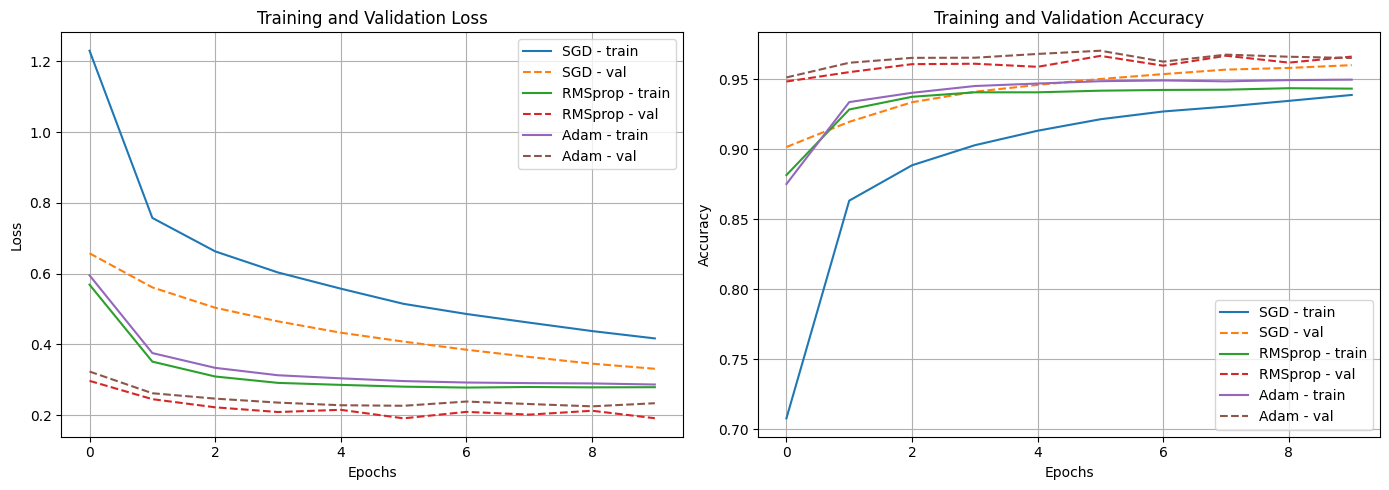

In [10]:
import matplotlib.pyplot as plt

# Créons les graphiques
plt.figure(figsize=(14, 5))

# 1️⃣ Courbe de Loss
plt.subplot(1, 2, 1)
for name, history in histories.items():
    plt.plot(history.history['loss'], label=f'{name} - train')
    plt.plot(history.history['val_loss'], linestyle='--', label=f'{name} - val')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# 2️⃣ Courbe de Accuracy
plt.subplot(1, 2, 2)
for name, history in histories.items():
    plt.plot(history.history['accuracy'], label=f'{name} - train')
    plt.plot(history.history['val_accuracy'], linestyle='--', label=f'{name} - val')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

